In [1]:
import pickle
import numpy as np

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV

# Read pickle data

In [2]:
with open('./data/titanic.pkl', 'rb') as f:
   X_titanic_train, y_titanic_train, X_titanic_test, y_titanic_test = pickle.load(f)

In [3]:
X_titanic_train.shape, y_titanic_train.shape

((891, 21), (891,))

In [4]:
X_titanic_test.shape, y_titanic_test.shape

((418, 21), (418,))

# Tuning

In [5]:
X_titanic = np.concatenate((X_titanic_train, X_titanic_test), axis=0)
y_titanic = np.concatenate((y_titanic_train, y_titanic_test), axis=0)

In [6]:
params = {'C': [2.0, 5.0 ,10.0, 20.0, 100.0], 'kernel': ['rbf', 'poly', 'sigmoid'], 'tol': [0.001, 0.0001]}

In [7]:
grid_search = GridSearchCV(estimator=SVC(tol=0.001), param_grid=params)
grid_search.fit(X_titanic, y_titanic)
best_param = grid_search.best_params_
best_result = grid_search.best_score_
print("Best Param: {} and Best Socore: {}".format(best_param, best_result))

Best Param: {'C': 100.0, 'kernel': 'rbf', 'tol': 0.001} and Best Socore: 0.8511421134216608


# Treinamento

In [8]:
svm = SVC(random_state=1, kernel=best_param['kernel'], C=best_param['C'], tol=0.001)
svm.fit(X_titanic_train, y_titanic_train)

SVC(C=100.0, random_state=1)

# Avaliação

In [9]:
predictors = svm.predict(X_titanic_test)

In [10]:
accuracy_score(y_titanic_test, predictors)

0.9521531100478469

/home/romulo/codes/projects/ml-titanic-survivor/.venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.9521531100478469

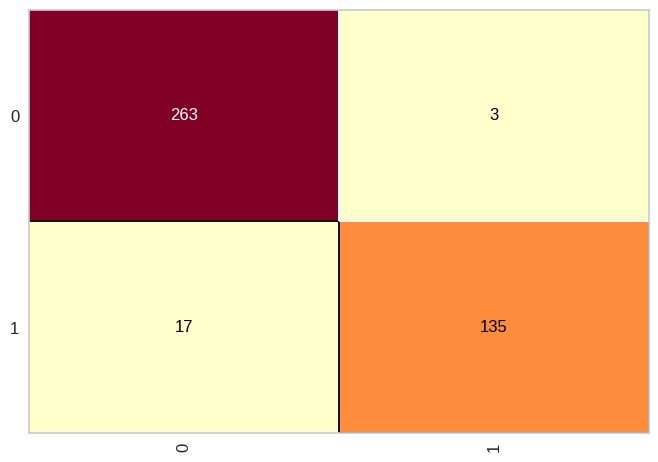

In [11]:
cm = ConfusionMatrix(svm)
cm.fit(X_titanic_train, y_titanic_train)
cm.score(X_titanic_test, y_titanic_test)

In [12]:
print(classification_report(y_titanic_test, predictors))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       266
           1       0.98      0.89      0.93       152

    accuracy                           0.95       418
   macro avg       0.96      0.94      0.95       418
weighted avg       0.95      0.95      0.95       418

